In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

dados_jogos = pd.read_csv('games.csv')
print(dados_jogos.head())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [51]:
dados_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [52]:
dados_jogos.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [53]:
# convertendo para minusculas

dados_jogos.columns = dados_jogos.columns.str.lower()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente em célula separada
- O método `head()` foi utilizado para exibir uma amostra dos dados
- O método `info()` foi utilizado para estudo inicial dos dados
- O nome das colunas foi renomeado para seguir a convenção `snake_case`
</div>

In [54]:
# Certificar que toda a coluna user_score esteja em formato numérico
# Substituir qualquer ocorrência persistente de 'tbd' por NaN
dados_jogos['user_score'] = dados_jogos['user_score'].replace('tbd', np.nan)
dados_jogos['user_score'] = pd.to_numeric(dados_jogos['user_score'], errors='coerce')

# Analisando a quantidade de valores ausentes nas colunas relevantes 
colunas_numericas = ['year_of_release', 'critic_score', 'user_score']
missing_counts = dados_jogos[colunas_numericas].isnull().sum()
print(missing_counts)

# removendo valores ausentes 
dados_jogos = dados_jogos.dropna(subset=colunas_numericas)

print(dados_jogos[colunas_numericas].isnull().sum())                                                              

year_of_release     269
critic_score       8578
user_score         9125
dtype: int64
year_of_release    0
critic_score       0
user_score         0
dtype: int64


In [55]:
# Agrupando por plataforma e calculando o primeiro e o último lançamento
ciclo_vida = dados_jogos.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
# Calculando o intervalo life_cycle em anos entre o último e o primeiro lançamento
ciclo_vida['life_cycle'] = ciclo_vida['max'] - ciclo_vida['min']
print(ciclo_vida)                                 

   platform     min     max  life_cycle
0       3DS  2011.0  2016.0         5.0
1        DC  1999.0  2001.0         2.0
2        DS  2004.0  2012.0         8.0
3       GBA  2001.0  2006.0         5.0
4        GC  2001.0  2007.0         6.0
5        PC  1985.0  2016.0        31.0
6        PS  1994.0  2002.0         8.0
7       PS2  2000.0  2010.0        10.0
8       PS3  2006.0  2015.0         9.0
9       PS4  2013.0  2016.0         3.0
10      PSP  2004.0  2013.0         9.0
11      PSV  2011.0  2016.0         5.0
12      Wii  2006.0  2012.0         6.0
13     WiiU  2012.0  2016.0         4.0
14     X360  2005.0  2014.0         9.0
15       XB  2000.0  2007.0         7.0
16     XOne  2013.0  2016.0         3.0


Text(0.5, 1.0, 'Distribuição do ciclo de vida das plataformas')

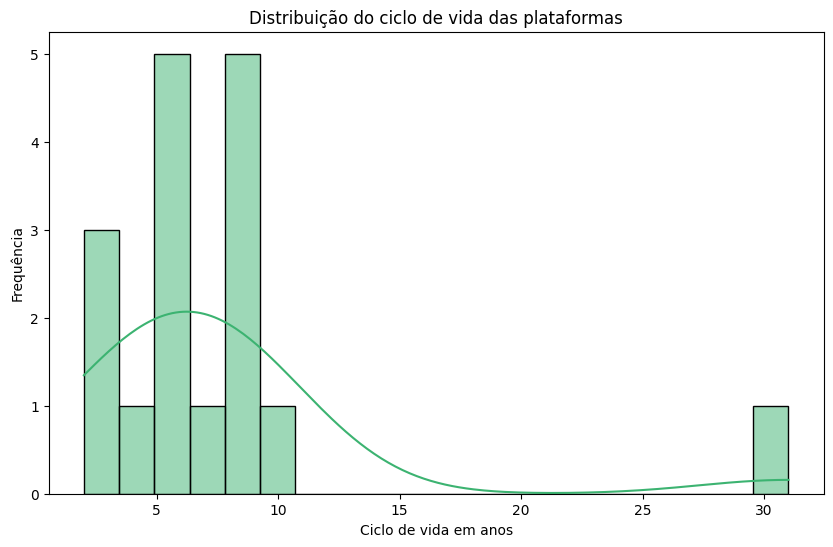

In [56]:
# Visualizando a distribuição do ciclo de vida das plataformas com um histograma
plt.figure(figsize=(10,6))
sns.histplot(ciclo_vida['life_cycle'], bins=20, kde=True, color='mediumseagreen')
plt.xlabel('Ciclo de vida em anos')
plt.ylabel('Frequência')
plt.title('Distribuição do ciclo de vida das plataformas')

   platform  first_release  peak_year  time_to_peak
0       3DS         2011.0     2011.0           0.0
1        DC         1999.0     1999.0           0.0
2        DS         2004.0     2005.0           1.0
3       GBA         2001.0     2001.0           0.0
4        GC         2001.0     2002.0           1.0
5        PC         1985.0     2011.0          26.0
6        PS         1994.0     1999.0           5.0
7       PS2         2000.0     2004.0           4.0
8       PS3         2006.0     2011.0           5.0
9       PS4         2013.0     2014.0           1.0
10      PSP         2004.0     2006.0           2.0
11      PSV         2011.0     2012.0           1.0
12      Wii         2006.0     2009.0           3.0
13     WiiU         2012.0     2013.0           1.0
14     X360         2005.0     2010.0           5.0
15       XB         2000.0     2004.0           4.0
16     XOne         2013.0     2014.0           1.0


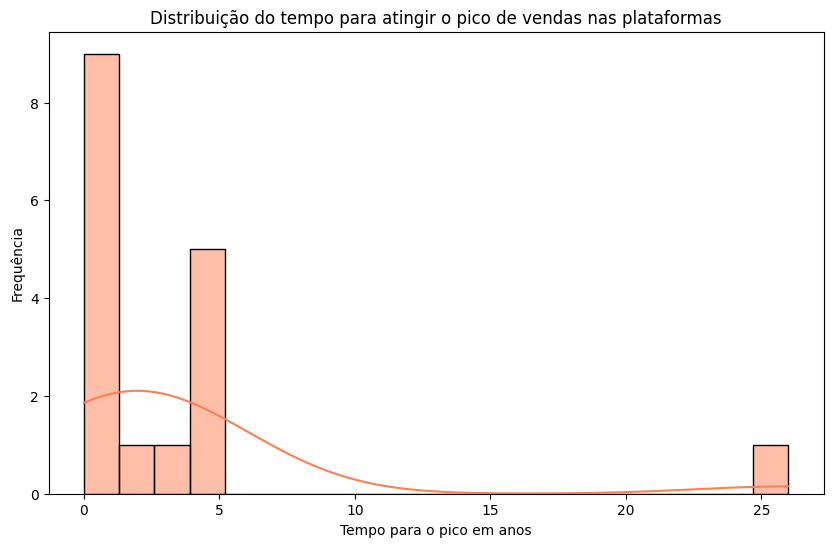

count    17.000000
mean      3.529412
std       6.073690
min       0.000000
25%       1.000000
50%       1.000000
75%       4.000000
max      26.000000
Name: time_to_peak, dtype: float64


In [57]:
# Criando coluna total_sales a partir de outras colunas
if 'total_sales' not in dados_jogos.columns:
    dados_jogos['total_sales'] = (
        dados_jogos['na_sales'] +
        dados_jogos['eu_sales'] +
        dados_jogos['jp_sales'] +
        dados_jogos['other_sales']
    )
# Agregando as vendas totais por plataforma e por ano
vendas_por_plataforma_ano = dados_jogos.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# indentificnado o ano de pico de vendas ano com vendas maximas
idx_peak = vendas_por_plataforma_ano.groupby('platform')['total_sales'].idxmax()
pico_por_plataforma = vendas_por_plataforma_ano.loc[idx_peak].reset_index(drop=True)
pico_por_plataforma.rename(columns={'year_of_release': 'peak_year'}, inplace=True)

# Obtendo o primeiro lançamento de cada plataforma
primeiro_lancamento = dados_jogos.groupby('platform')['year_of_release'].min().reset_index().rename(columns={'year_of_release': 'first_release'})

#calculando o tempo até o pico
tempo_ate_pico = pd.merge(pico_por_plataforma, primeiro_lancamento, on='platform')
tempo_ate_pico['time_to_peak'] = tempo_ate_pico['peak_year'] - tempo_ate_pico['first_release']

# Tempo para atingir o pico de vendas
print(tempo_ate_pico[['platform', 'first_release', 'peak_year', 'time_to_peak']])

# distribuição do tempo até o pico
plt.figure(figsize=(10,6))
sns.histplot(tempo_ate_pico['time_to_peak'], bins=20, kde=True, color='coral')
plt.xlabel('Tempo para o pico em anos')
plt.ylabel('Frequência')
plt.title('Distribuição do tempo para atingir o pico de vendas nas plataformas')
plt.show()

print(tempo_ate_pico['time_to_peak'].describe())

**Conclusão**

A análise do tempo necessário para que as plataformas atinjam seu pico de vendas revelou uma variação considerável entre elas. Em média, as plataformas levam alguns anos, desde o primeiro lançamento, para alcançar o ponto de máxima performance. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição de lançamentos ao longo dos anos foi analisada
- Um gráfico de barras foi utilizado corretamente
</div>

**No próximo passo, vou analisar como as vendas variam de plataforma para plataforma.**

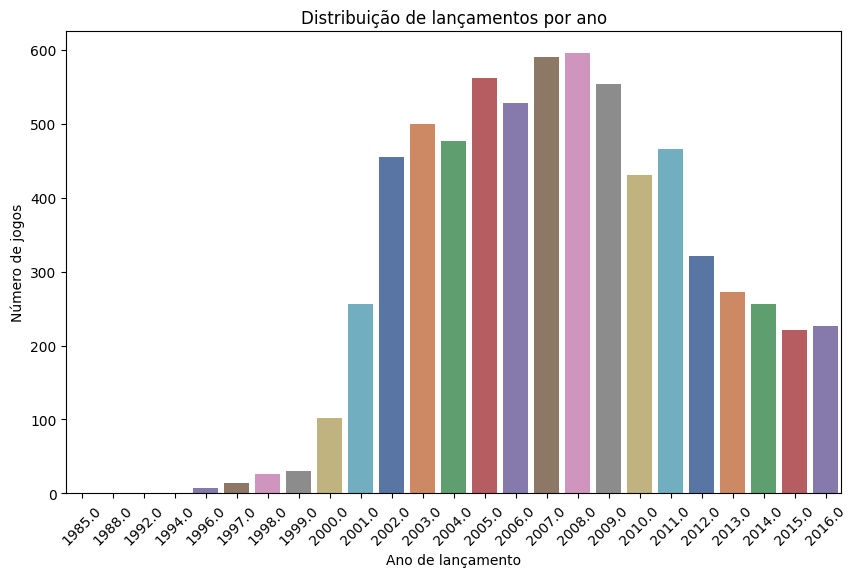

Número de jogos no período 2012 a 2017: 1297


In [58]:
# plotando a distribuição dos lançamentos por ano
plt.figure(figsize=(10,6))
sns.countplot(data=dados_jogos, x='year_of_release', palette='deep')
plt.title("Distribuição de lançamentos por ano")
plt.xlabel("Ano de lançamento")
plt.ylabel("Número de jogos")
plt.xticks(rotation=45)
plt.show()

#filtrando os dados para incluir os anos de 2012 a 2017
dados_relevantes = dados_jogos[(dados_jogos['year_of_release'] >= 2012) & (dados_jogos['year_of_release'] <= 2017)]
print("Número de jogos no período 2012 a 2017:", dados_relevantes.shape[0])

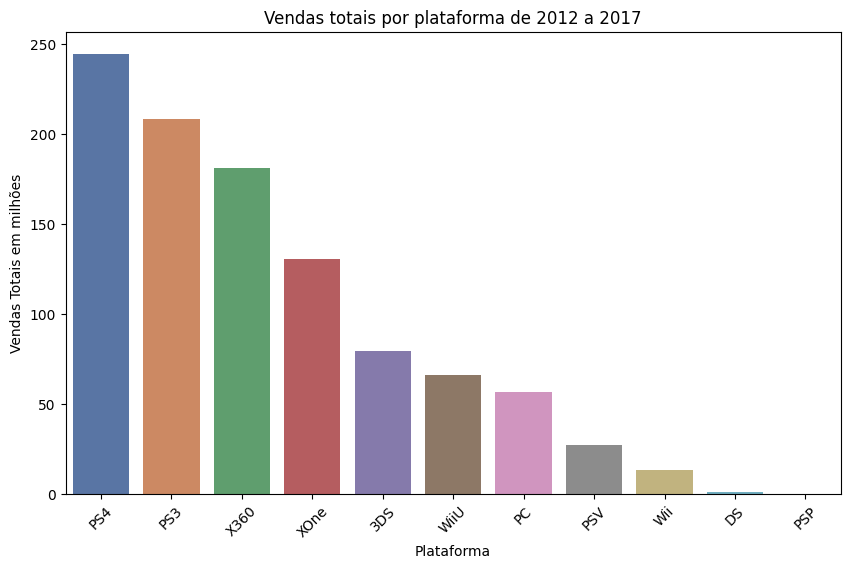

In [59]:
# Visualizando as vendas totais por plataforma
vendas_por_plataforma_relevantes = dados_relevantes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=vendas_por_plataforma_relevantes.index, y=vendas_por_plataforma_relevantes.values, palette='deep')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais em milhões')
plt.title('Vendas totais por plataforma de 2012 a 2017')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A coluna `total_sales` foi criada corretamente para agregar a receita!

</div>

**Conclusão**

A análise da distribuição dos lançamentos por ano mostrou que a maior concentração de dados ocorre a partir de 2012.

**No proximo passo vou contruir um diagrama de caixa para vendas globais dividas por plataforma.**

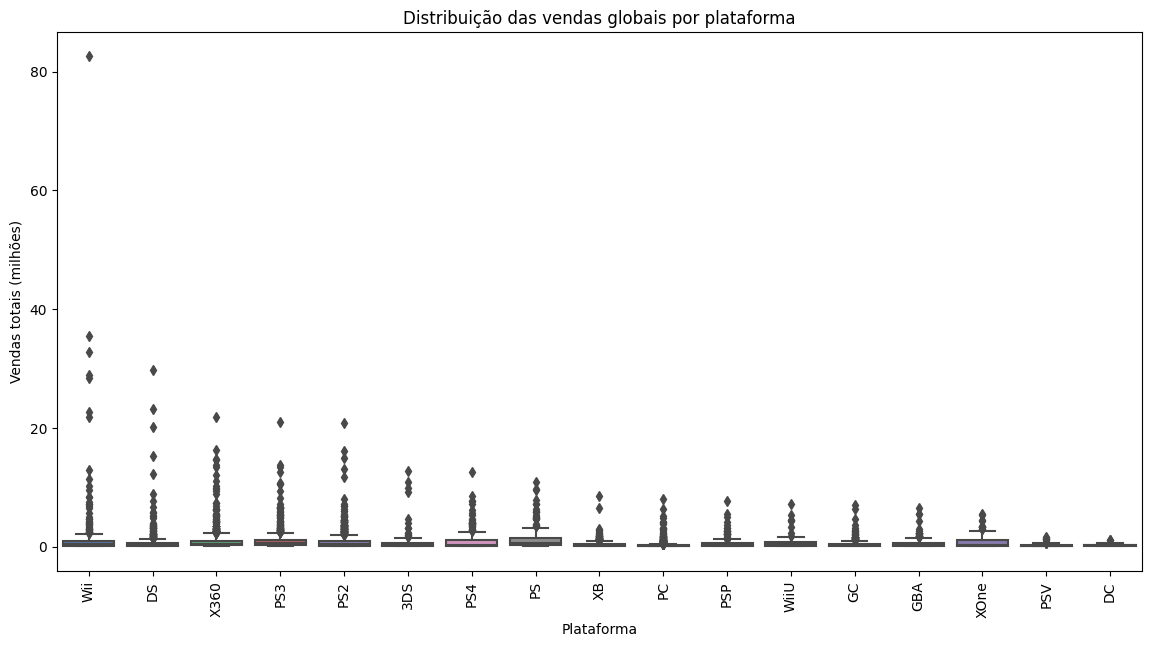

In [60]:
# Criando diagrama de caixa
plt.figure(figsize=(14, 7))
sns.boxplot(x='platform', y='total_sales', data=dados_jogos, palette="deep")
plt.xticks(rotation=90)
plt.xlabel('Plataforma')
plt.ylabel('Vendas totais (milhões)')
plt.title('Distribuição das vendas globais por plataforma')
plt.show()

In [61]:
# Cálculando a variância e do desvio padrão para as vendas totais
variancia_total_sales = dados_jogos['total_sales'].var()
desvio_padrao_total_sales = dados_jogos['total_sales'].std()

print("Variância das vendas totais:", variancia_total_sales)
print("Desvio padrão:", desvio_padrao_total_sales)

Variância das vendas totais: 3.822045550086739
Desvio padrão: 1.955005255769595


**Conclusão**

O boxplot revela que algumas plataformas, como a PS2, apresentam uma mediana alta de vendas com menor dispersão, indicando uma performance mais consistente.  
Já outras plataformas mostram uma maior variabilidade.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A distribuição dos vendass entre as plataformas foi analisada
</div>

**Próximo passo, vou fazer um estudo do perfil por região (AN, UE, JP), determinando as cinco principais plataformas para cada região, calculando suas vendas**

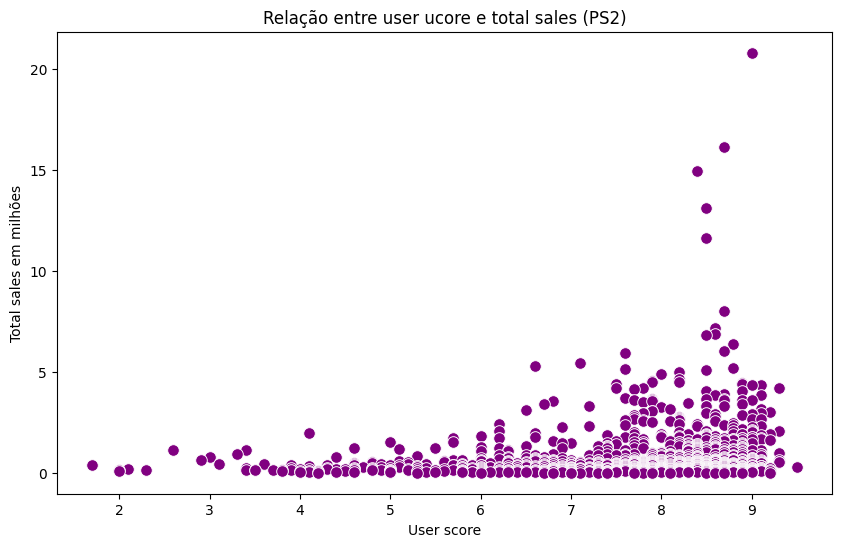

0.17168986651472434


In [62]:
# Filtrar os dados para a plataforma PS2
dados_ps2 = dados_jogos[dados_jogos['platform'] == 'PS2']

#Gráfico de dispersão user_score x total_sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=dados_ps2, x='user_score', y='total_sales', s=70, color='purple')
plt.xlabel('User score')
plt.ylabel('Total sales em milhões')
plt.title('Relação entre user ucore e total sales (PS2)')
plt.show()

# Calculando da correlação entre user_score e total_sales para PS2
correlacao_user = dados_ps2['user_score'].corr(dados_ps2['total_sales'])
print(correlacao_user)


Região: AN
Top 5 plataformas em vendas totais:
platform
X360    533.61
PS2     472.65
Wii     342.91
PS3     341.94
DS      173.52
Name: na_sales, dtype: float64


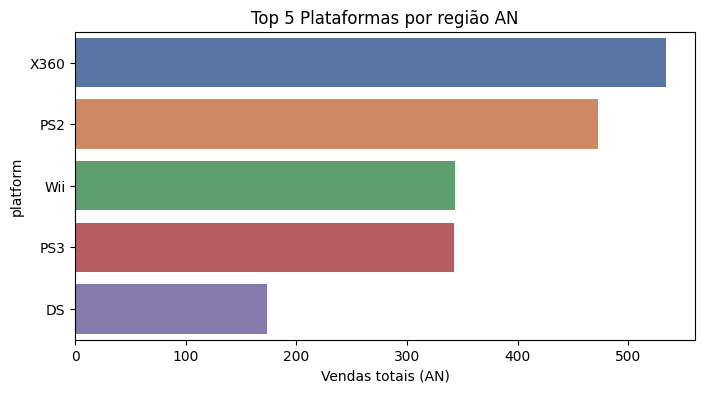


Região: UE
Top 5 plataformas em vendas totais:
platform
PS3     273.84
PS2     255.14
X360    234.54
Wii     204.14
PS4     112.44
Name: eu_sales, dtype: float64


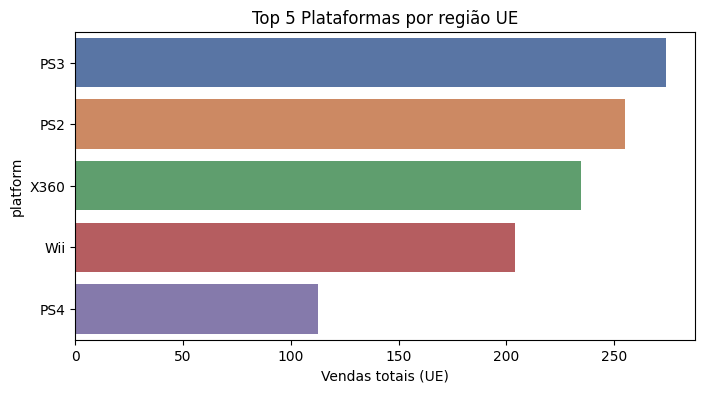


Região: JP
Top 5 plataformas em vendas totais:
platform
DS     83.66
PS2    75.81
PS3    54.72
Wii    52.62
PS     40.38
Name: jp_sales, dtype: float64


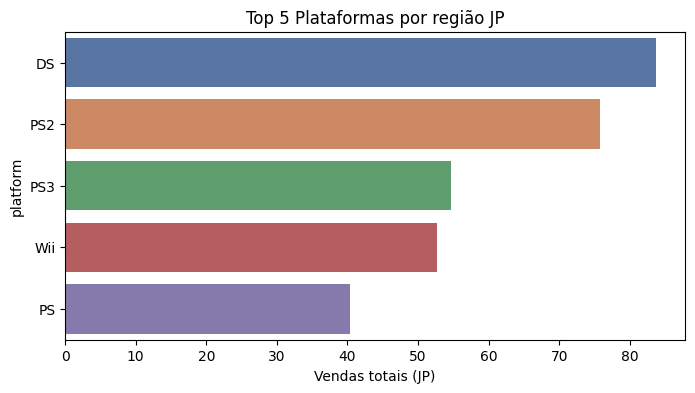

In [63]:
# regioes e suas colunas
regioes = {
    'AN': 'na_sales', 
    'UE': 'eu_sales', 
    'JP': 'jp_sales'   
}

# percorrendo por cada região e calculando as vendas totais por plataforma
for region, sales_col in regioes.items():
    # Agrupando os dados por plataforma e somando as vendas da região
    regional_sales = dados_jogos.groupby('platform')[sales_col].sum().sort_values(ascending=False).head(5)
    
    # Exibindo os resultados para as 5 principais plataformas
    print(f"\nRegião: {region}")
    print("Top 5 plataformas em vendas totais:")
    print(regional_sales)
    
    #Plotando gráfico de barras para as 5 principais plataformas da região
    plt.figure(figsize=(8,4))
    sns.barplot(x=regional_sales.values, y=regional_sales.index, palette='deep')
    plt.xlabel(f'Vendas totais ({region})')
    plt.title(f'Top 5 Plataformas por região {region}')
    plt.show()

**Conclusão**

Os resultados mostram que as preferências dos jogadores variam bastante de uma região para outra. Algumas plataformas são populares em quase todo lugar, enquanto outras fazem mais sucesso em regiões específicas.


In [64]:
# H0: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
# H1: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.
# Filtrando os dados para as plataformas Xbox One e PC
dados_xbox = dados_jogos[dados_jogos['platform'] == 'XOne']['user_score']
dados_pc   = dados_jogos[dados_jogos['platform'] == 'PC']['user_score']

# Realizando o teste t para amostras independentes
t_stat_plat, p_val_plat = stats.ttest_ind(dados_xbox, dados_pc, equal_var=False)
print("Estatística t para plataformas, Xbox One vs PC:", t_stat_plat)
print("p-valor para plataformas, Xbox One vs PC:", p_val_plat)

Estatística t para plataformas, Xbox One vs PC: -4.226006950970501
p-valor para plataformas, Xbox One vs PC: 3.237925656023916e-05


In [65]:
# H0: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas.
# H1: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
# Filtrando os dados para os generos Action e Sports
dados_action = dados_jogos[dados_jogos['genre'] == 'Action']['user_score']
dados_sports = dados_jogos[dados_jogos['genre'] == 'Sports']['user_score']

# Realizando o teste t para amostras independentes
t_stat_gen, p_val_gen = stats.ttest_ind(dados_action, dados_sports, equal_var=False)
print("Estatística t para os generos Action vs Sports:", t_stat_gen)
print("p-valor para os generos Action vs Sports):", p_val_gen)

Estatística t para os generos Action vs Sports: 0.026598551833740682
p-valor para os generos Action vs Sports): 0.9787827074917653


**Conclusão**

 Essa analise ajuda a perceber como os jogadores avaliam diferentes plataformas e gêneros de jogos, o que pode ajudar a orientar em futuras decisões e estratégias.

**Conclusão geral**

Essas análises ajudam desenvolvedores e profissionais de marketing a entender melhor como adaptar suas estratégias para diferentes públicos e regiões. Com esses dados, eles podem tomar decisões mais informadas sobre como criar jogos e campanhas de marketing que atendam melhor as expectativas e preferências dos jogadores.